<a href="https://colab.research.google.com/github/Toeylik/kku_data_mining/blob/master/Kmearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_blobs


In [ ]:
X,y = make_blobs(n_samples=300, centers=3, n_features=2,random_state=6)

In [ ]:
X.shape


(300, 2)

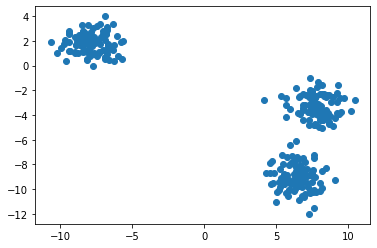

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1])

##Import


In [ ]:
from sklearn.cluster import KMeans

##Define

In [ ]:
KMclust = KMeans(n_clusters=5)

In [ ]:
KMclust.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

##Predict


In [ ]:
Iabel = KMcIust.predict(X)

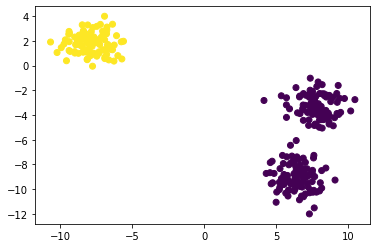

In [ ]:
plt.scatter(X[:,0],X[:,1],c=Iabel)

##Color quantization





In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/DWDM_material'


Mounted at /content/drive


In [ ]:
import cv2
import os

In [ ]:
img = cv2.imread(os.path.join(path,'original.jpg'))

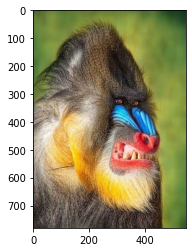

In [ ]:
RGB_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [ ]:
RGB_img.shape

(780, 547, 3)

## count unique colors

In [ ]:
import numpy as np

In [ ]:
np.unique(RGB_img).shape

(256,)

## use k-mean to reduce color from 256 colors to 8 colors

In [ ]:
##Define
myQuantiza = KMeans(n_clusters=8)


In [ ]:
img_row = np.reshape (RGB_img, (780*547,3) )
img_row

array([[ 66, 104,  55],
       [ 67, 105,  56],
       [ 68, 104,  56],
       ...,
       [ 49,  90,  34],
       [ 49,  90,  34],
       [ 49,  90,  34]], dtype=uint8)

In [ ]:
##Train
myQuantiza.fit(img_row)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
res = myQuantiza.predict(img_row)

In [ ]:
res

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

## Get cluster centers


In [ ]:
Clus_cen = myQuantiza.cluster_centers_
Clus_cen

array([[163.20976999, 140.6615411 , 120.53542211],
       [229.0985319 , 203.67422777, 161.16676508],
       [ 87.91521106,  74.80450934,  57.45225315],
       [ 49.76988636, 150.21875   , 206.60430195],
       [144.75518376, 154.57646736,  67.6810203 ],
       [230.5410538 , 159.36954958,  63.86804602],
       [111.23838007, 121.42380612,  66.36808844],
       [ 45.96832373,  38.10391796,  28.0110669 ]])

In [ ]:
Clus_cen.shape

(8, 3)

## Map color name back to image

In [ ]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
  for j in range(RGB_img.shape[1]):
    new_img[i,j,:] = Clus_cen[myQuantiza.predict([RGB_img[i,j,:]]),:]


In [ ]:
new_img_ = new_img/255


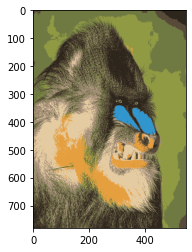

In [ ]:

plt.imshow(new_img_)
